In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
SIZES = [10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

In [3]:
df = pd.DataFrame(columns=['Grid Size', 'Time (s)', 'Type'])
for S in SIZES:
    match_comparison = f'_{S}.csv'
    for f_name in os.listdir('mazes'):
        if match_comparison not in f_name or 'run_times' not in f_name:
            continue
            
        temp_df = pd.read_csv(os.path.join('mazes', f_name))
        for _, row in temp_df.iterrows():
            df = df.append({'Grid Size': S, 'Time (s)': row['G'], 'Type': 'G'}, ignore_index=True)
            df = df.append({'Grid Size': S, 'Time (s)': row['HG'], 'Type': 'HG'}, ignore_index=True)

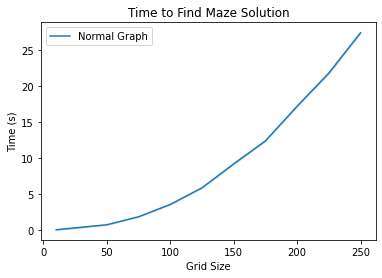

In [6]:
sns.lineplot(data=df[df['Type'] == 'G'], x="Grid Size", y='Time (s)', label='Normal Graph')
plt.title('Time to Find Maze Solution')
plt.savefig('G.png', facecolor='WHITE')

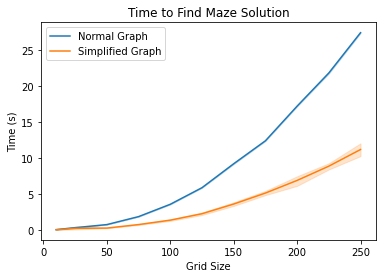

In [8]:
plt.title('Time to Find Maze Solution')
sns.lineplot(data=df[df['Type'] == 'G'], x="Grid Size", y='Time (s)', label='Normal Graph')
sns.lineplot(data=df[df['Type'] == 'HG'], x="Grid Size", y='Time (s)', label='Simplified Graph')
plt.savefig('G_HG.png', facecolor='WHITE')